# Manual backprop examples

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

# Example 1

Manual Backprop

## Numerical evaluation of the derivative

If we nudge the input from $3$ to slightly above say $3+h$ (for some $h>0$) how do we expect the function above to respond? Well we expect it to go up. The $\hbox{slope}=\frac{f(x+h)-f(x)}{h}$ measures the rate at which the function responds per unit increment of the input. 

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
h = 0.00000001
x = 3.
( f(x+h) - f(x) )/h

14.00000009255109

### How small of an h?
The mathematical definition of derivative requires us to take h to zero. However since we are working with floating point arithmetic and the represenation of these numbers are finite so making h too small will get us into trouble.

In [ ]:
{h : ( f(x+h) - f(x) )/h for h in [0.001, 0.0001, 0.00000001, 0.0000000000000001]}

{0.001: 14.00300000000243,
 0.0001: 14.000300000063248,
 1e-08: 14.00000009255109,
 1e-16: 0.0}

In [ ]:
# If the slope is negative the function will go down when we nudge the input upward.
x = -3.
(f(x+h) - f(x))/h

-22.00000039920269

Is there a point where the function does not respond at all if we were to nudge it?
Why yes, in this case we see that happens at 2/3

In [ ]:
x = 2/3.
(f(x+h) - f(x))/h

0.0

Let's get more complex
We define d to be a function of three scalar inputs a, b and c

In [ ]:
a, b, c = 2., -3., 10.
d = a*b + c
print(d)

4.0


Let's look at the derivative of d with respect to a, b and c

In [ ]:
h = 0.0001
a, b, c = 2., -3., 10.

d1 = a*b + c

print('d1',d1)

d1 4.0


If we nudge `a` up will the function go up or down?

In [ ]:
a += h
d2 = a*b + c

It will go down.
`a` is slightly higher but it is being multiplied by a negative number
so the product itself is slightly larger negative number than before.
Hence the function will go down.

In [ ]:
print('d1',d1)
print('d2',d2)

d1 4.0
d2 3.999699999999999


The above tells us the slope will be a negative number

In [ ]:
print('slope', (d2-d1)/h)

slope -3.000000000010772


If we nudge `b` up will the function go up or down? 

In [ ]:
h = 0.0001
a, b, c = 2., -3., 10.

d1 = a*b + c
b += h
d2 = a*b + c
print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


Finally, examine the influence of c on the output.
If we nudge `c` up will the function go up or down? 

In [ ]:
h = 0.0001
a, b, c = 2., -3., 10.

d1 = a*b + c
c += h
d2 = a*b + c
print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
from neev.engine import *

In [ ]:
a = Value(2., label='a')
a

Value(data=2.0)

In [ ]:
b = Value(-3, label='b')
a+b

Value(data=-1.0)

In [ ]:
c = Value(10., label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d

Value(data=4.0)

In [ ]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [ ]:
d._op

'+'

In [ ]:
f = Value(-2.); f.label='f'
L = d*f; L.label = 'L'
L

Value(data=-8.0)

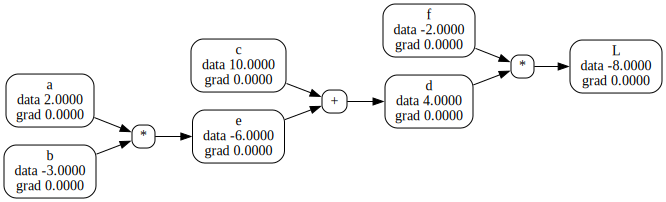

In [ ]:
from neev.viz import *

Visualize the computation graph. Observe that all the grad values are zero. We will start filling them in manually.

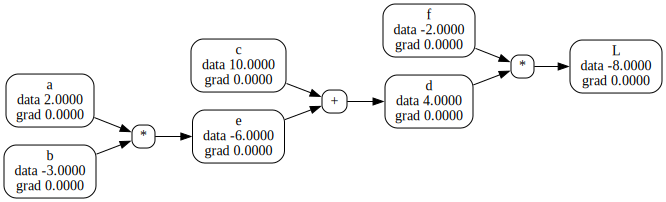

In [ ]:
view_dot(L)

`dL_d` can be used to check each of the gradients that we will be manually computing.

In [ ]:
def dL_d(what='L'):
    '''nudge the parameter specified in the `what` by a small amount,
        compute the gradient numerically and return it.
    '''
    
    if what not in ['a','b','c','d','e','f','L']:
        raise Exception
        
    h_a = 0.0001 if what=='a' else 0
    h_b = 0.0001 if what=='b' else 0
    h_c = 0.0001 if what=='c' else 0   
    h_d = 0.0001 if what=='d' else 0
    h_e = 0.0001 if what=='e' else 0
    h_f = 0.0001 if what=='f' else 0    
    h_L = 0.0001 if what=='L' else 0
    
    a,b,c = Value(2.,label='a'),Value(-3.,label='b'),Value(10.,label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.); f.label='f'
    L = d*f; L.label = 'L'
    L1 = L.data

    a,b,c = Value(2.+h_a,label='a'),Value(-3.+h_b,label='b'),Value(10.+h_c,label='c')
    e = a*b;e.data += h_e; e.label = 'e'
    d = e + c; d.data += h_d; d.label = 'd'
    f = Value(-2.);f.data += h_f; f.label='f'
    L = d*f; L.label = 'L'
    L2 = L.data + h_L
    
    return ((L2-L1)/h)

In [ ]:
#|hide
# Manually compute gradients
d.grad=f.data
f.grad=d.data
L.grad=1

Now that we have filled in the gradients for $L,d$ and $f$ let's visualize the computation graph.

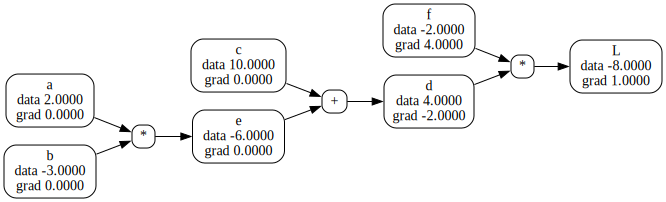

In [ ]:
view_dot(L)

In [ ]:
# The gradients from our manual and the numerical check are the same up to "floating point funkiness"
dL_d('L'), L.grad

(0.9999999999976694, 1)

In [ ]:
#|hide
dL_d('d'), f.data

(-1.9999999999953388, -2.0)

In [ ]:
#|hide
dL_d('f'), d.data

(3.9999999999995595, 4.0)

## Gradients for the middle layer

Next we derive gradients for the middle layer starting with $\frac{\partial L}{\partial c}$. We need to understand how $L$ responds when $c$ is wiggled. This effect is transmitted through $d$ and recall that we derived earlier how $L$ responds when $d$ is wiggled. So if we can figure out how $c$ impacts $d$ then we can put that together with the information on how $d$ impacts $L$ to determine how $c$ impacts $L$.

Per Karpathy, _"This is crucial, if you understand the gradient of node $c$ then you understand all of backpropagation and all of the training of neural nets."_

$\frac{\partial L}{\partial c} = \frac{\partial d}{\partial c}*\frac{\partial L}{\partial d}$

Since $d = e + c$ we have that $\frac{\partial d}{\partial c} = 1$ (the "local" derivative of the sum expression is simple).

Or $\frac{\partial L}{\partial c} = 1*\frac{\partial L}{\partial d} = \frac{\partial L}{\partial d}$

Similarly, $\frac{\partial L}{\partial e} = \frac{\partial L}{\partial d}$.

*So the sum node distributes the incoming gradient as-is to each of it's children.*

In [ ]:
c.grad = d.grad
e.grad = d.grad

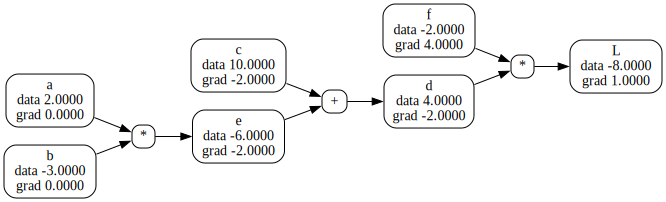

In [ ]:
view_dot(L)

In [ ]:
dL_d('c'), d.grad

(-1.9999999999953388, -2.0)

In [ ]:
dL_d('e'), d.grad

(-1.9999999999953388, -2.0)

What is $\frac{\partial L}{\partial a}$? 

It is $\frac{\partial e}{\partial a}*\frac{\partial L}{\partial e} = b*\frac{\partial L}{\partial e} = -3*-2 = 6$

In [ ]:
a.grad=e.grad * b.data
a.grad

6.0

In [ ]:
dL_d('a')

6.000000000021544

Similarly $\frac{\partial L}{\partial b} = \frac{\partial e}{\partial b}*\frac{\partial L}{\partial e} = a*\frac{\partial L}{\partial e} = 2*-2=-4$

In [ ]:
# Manually compute gradients
b.grad=e.grad * a.data
b.grad

-4.0

In [ ]:
#|hide
dL_d('b')

-4.000000000008441

In [ ]:
d.grad

-2.0

At this point we have manually backpropagated through this simple example and verified that they are correct using the `dl_d`.

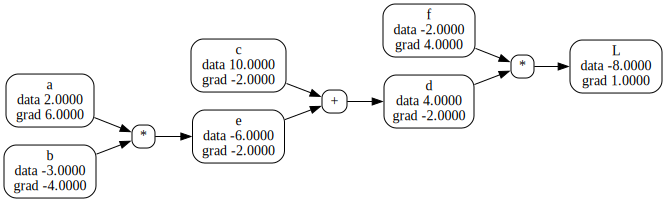

In [ ]:
view_dot(L)

## Make L increase

Next let's nudge of the leaf nodes that we control so as to make $L$ increase.

How? Well we observe that:

* If the value of a leaf node that we control is positive and the gradient is positive then nudging the value of such a leaf node up will make the loss go up.
    * Nudging such a value by an amount which is $0.01$ times the gradient, will make us go from a positive value to a more positive value (thus nudging the value up) and this will make the loss go up.
    * This is the case for $a$ it's value is $2$ and it's gradient is $6$
* If the value of a leaf node that we control is positive and the gradient is negative then that means that nudging the value of such a leaf node up will make the loss go down.
    * Nudging such a value by an amount which is $0.01$ times the gradient, will make us go from a positive value to a less positive value (thus nudging the value down) and this will make the loss go up.
    * This is the case for $c$ it's value is $10$ and it's gradient is $-2$
* If the value of a leaf node that we control is negative and the gradient is positive then that nudging the value of such a leaf node up will make the loss go up.
    * Nudging such a value by an amount which is $0.01$ times the gradient, will make us go from a negative value to a less negative value (thus nudging the value up) and this will make the loss go up.
    * This is the case for $f$ it's value is $-2$ and it's gradient is $4$
* If the value of a leaf node that we control is negative and the gradient is negative then that nudging the value of such a leaf node up will make the loss go down.
    * Nudging such a value by an amount which is $0.01$ times the gradient, will make us go from a negative value to a more negative value (thus nudging the value down) and this will make the loss go up. 
    * This is the case for $b$ it's value is $-3$ and it's gradient is $-4$

TL;DR

* The strategy to increase the loss, in all cases, is to nudge the value by some small number times the gradient.
* Conversely to decrease the lose we need to nudge the value by some small number times the negative of the gradient.

In [ ]:
# forward pass
a,b,c = Value(2.,label='a'),Value(-3.,label='b'),Value(10.,label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2); f.label='f'
L = d*f; L.label = 'L'
L

Value(data=-8.0)

In [ ]:
#|hide

# manual gradients
L.grad=1
f.grad=d.data
d.grad=f.data
c.grad = d.grad
e.grad = d.grad
b.grad=e.grad * a.data
a.grad=e.grad * b.data

# nudge leaf nodes that we control
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

# forward pass to evaluate L
e = a*b
d = e + c
L = d*f
L

Value(data=-7.286496)

Hooray, $L$ increased from $-8$ to $-7.28$!

## Example 2

* bias $b$ is the "innate trigger happiness" of the neuron

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights of the neuron
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.881375870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+x2w2'
n = x1w1x2w2 + b; n.label='n'

o= n.tanh(); o.label='o'

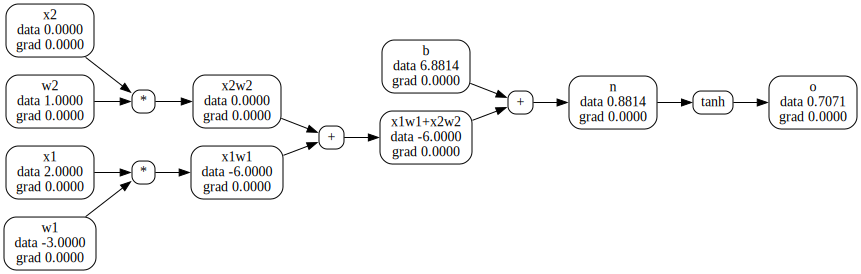

In [ ]:
view_dot(o)

$\frac{\partial o}{\partial o} = 1$

In [ ]:
o.grad = 1 #do_do = 1

$\frac{\partial o}{\partial n} = \frac{\partial \tanh(n)}{\partial n} = 1-\tanh(n)^2 = 1 - o^2$

In [ ]:
n.grad =  1 - (o.data**2)

Recall that the plus (+) operator acts as a distributor of gradients so it will just flow the back the incoming gradient to it's children nodes. It's helpful to think of the gradient as flowing from the left to the right.

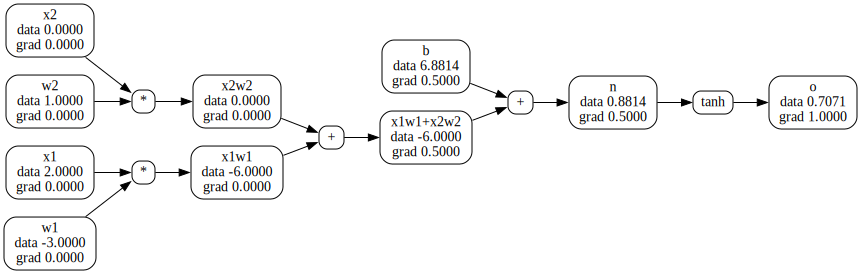

In [ ]:
b.grad = n.grad
x1w1x2w2.grad = n.grad
view_dot(o)

Next we encounter the + operator again so we distribute the incoming $0.5$ to both $x1w1$ and $x2w2$.

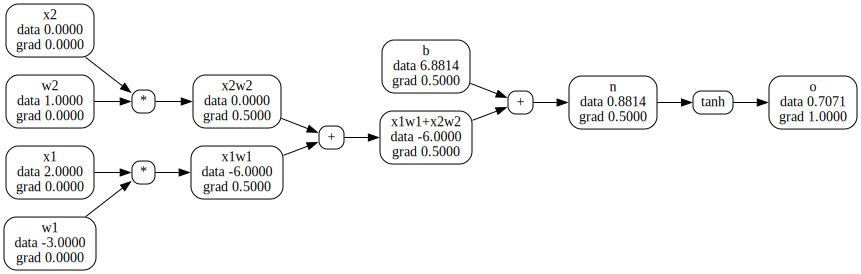

In [ ]:
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad
view_dot(o)

For the * operator for $x1w1$ we know that $x1$'s local grad will be $w1$'s data. So,

In [ ]:
x1.grad = w1.data*x1w1.grad

In [ ]:
# Similarly,
w1.grad = x1.data*x1w1.grad

In [ ]:
x2.grad = w2.data*x2w2.grad
w2.grad = x2.data*x2w2.grad

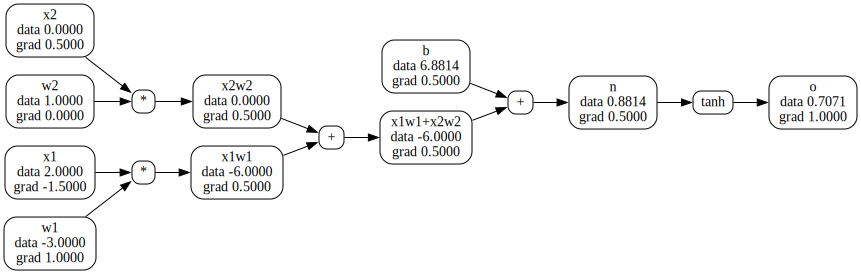

In [ ]:
view_dot(o)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()